<a href="https://colab.research.google.com/github/princekjha/Global-Terrorism/blob/main/Colab_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
# importing laibraries
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline\

In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# reading csv file
global_terrorism = pd.read_csv('/content/drive/MyDrive/Global Terrorism Data.csv',encoding='ISO-8859-1')



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



## **Details of DataFrame**

In [ ]:
# lets see some top rows
global_terrorism.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
# let see some bottom rows
global_terrorism.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [ ]:
global_terrorism.shape

(181691, 135)

In [ ]:
print(global_terrorism.columns)

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)


In [ ]:
global_terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
global_terrorism.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


# **Data Cleaning**

In [ ]:
# rename the columns name for easy to analysis
global_terrorism.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','city':'City','provstate':'State',
                          'region_txt':'Region','attacktype1_txt':'Attack_Type','targtype1_txt':'Main_Target','nkill':'Killed',
                          'nwound':'Wounded','gname':'Gang_Name',
                          'weaptype1_txt':'Weapon_Type','latitude':'Latitude',
                          'longitude':'Longitude','targsubtype1_txt':'Sub_Target',
                          'natlty1_txt':'Nationality',},inplace=True)

In [ ]:
global_terrorism.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
global_terrorism = global_terrorism[['Year','Month','Day','Gang_Name','Nationality','Country','State','Region','City','Latitude','Longitude'
                                     ,'Attack_Type','Weapon_Type','Main_Target','Sub_Target','Killed','Wounded']]

In [ ]:
global_terrorism.head(5)

,Year,Month,Day,Gang_Name,Nationality,Country,State,Region,City,Latitude,Longitude,Attack_Type,Weapon_Type,Main_Target,Sub_Target,Killed,Wounded
0,1970,7,2,MANO-D,Dominican Republic,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Unknown,Private Citizens & Property,Named Civilian,1.0,0.0
1,1970,0,0,23rd of September Communist League,Belgium,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Unknown,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",0.0,0.0
2,1970,1,0,Unknown,United States,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Unknown,Journalists & Media,Radio Journalist/Staff/Facility,1.0,0.0
3,1970,1,0,Unknown,United States,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Explosives,Government (Diplomatic),Embassy/Consulate,NaN,NaN
4,1970,1,0,Unknown,United States,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Incendiary,Government (Diplomatic),Embassy/Consulate,NaN,NaN


In [ ]:
global_terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Gang_Name    181691 non-null  object 
 4   Nationality  180132 non-null  object 
 5   Country      181691 non-null  object 
 6   State        181270 non-null  object 
 7   Region       181691 non-null  object 
 8   City         181257 non-null  object 
 9   Latitude     177135 non-null  float64
 10  Longitude    177134 non-null  float64
 11  Attack_Type  181691 non-null  object 
 12  Weapon_Type  181691 non-null  object 
 13  Main_Target  181691 non-null  object 
 14  Sub_Target   171318 non-null  object 
 15  Killed       171378 non-null  float64
 16  Wounded      165380 non-null  float64
dtypes: float64(4), int64(3), object(10)
memory usage: 23.6+ MB


In [ ]:
global_terrorism['Wounded'] = global_terrorism['Wounded'].fillna(0).astype(int)
global_terrorism['Killed'] = global_terrorism['Killed'].fillna(0).astype(int)
global_terrorism.shape

(181691, 17)

In [ ]:
global_terrorism.head()

,Year,Month,Day,Gang_Name,Nationality,Country,State,Region,City,Latitude,Longitude,Attack_Type,Weapon_Type,Main_Target,Sub_Target,Killed,Wounded
0,1970,7,2,MANO-D,Dominican Republic,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Unknown,Private Citizens & Property,Named Civilian,1,0
1,1970,0,0,23rd of September Communist League,Belgium,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Unknown,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",0,0
2,1970,1,0,Unknown,United States,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Unknown,Journalists & Media,Radio Journalist/Staff/Facility,1,0
3,1970,1,0,Unknown,United States,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Explosives,Government (Diplomatic),Embassy/Consulate,0,0
4,1970,1,0,Unknown,United States,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Incendiary,Government (Diplomatic),Embassy/Consulate,0,0


In [ ]:
global_terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Gang_Name    181691 non-null  object 
 4   Nationality  180132 non-null  object 
 5   Country      181691 non-null  object 
 6   State        181270 non-null  object 
 7   Region       181691 non-null  object 
 8   City         181257 non-null  object 
 9   Latitude     177135 non-null  float64
 10  Longitude    177134 non-null  float64
 11  Attack_Type  181691 non-null  object 
 12  Weapon_Type  181691 non-null  object 
 13  Main_Target  181691 non-null  object 
 14  Sub_Target   171318 non-null  object 
 15  Killed       181691 non-null  int64  
 16  Wounded      181691 non-null  int64  
dtypes: float64(2), int64(5), object(10)
memory usage: 23.6+ MB


## ***Analysis of Data***

bold text# **Analysis based on Attacks**

1.   Top 10 Terrorist organization with most no. of attacks.
2.   Top terrorist organization and their favourite attack types.
3.   Type of attack mostly used by the terrorist organization.
4.   Top 10 most attacked targets.



## 1. Top 10 Terrorist organization with most no. of attacks.

In [ ]:
# Top 10 Gang name
global_terrorism['Gang_Name'].value_counts()[:11]

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Name: Gang_Name, dtype: int64

Above 80000 of attacks were done by the Unknown terrorist organization

In [ ]:
#Eliminating unknown Gang_Name from the data
top_gang_with_most_attacks = global_terrorism['Gang_Name'].value_counts()[1:11]
top_gang_with_most_attacks

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: Gang_Name, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



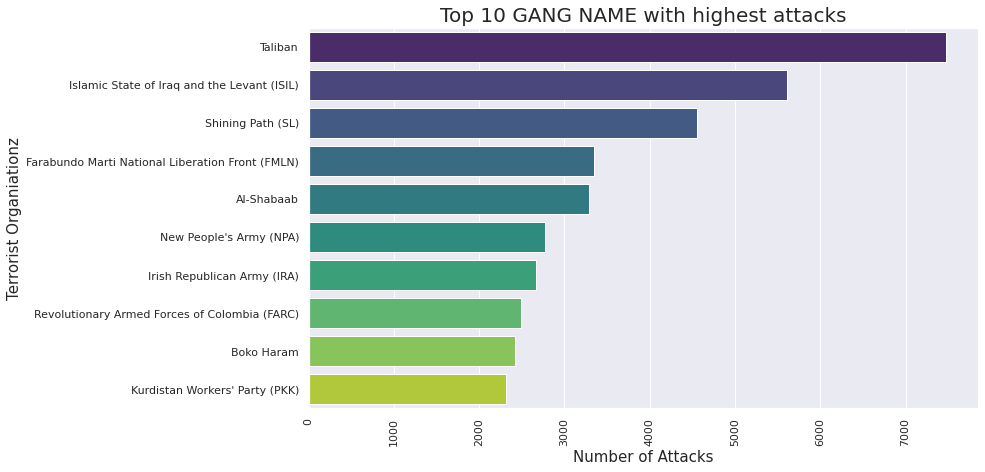

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize = (12,7))
sns.barplot(top_gang_with_most_attacks.values, top_gang_with_most_attacks.index,palette='viridis')
plt.title('Top 10 GANG NAME with highest attacks',fontsize=20)
plt.xlabel('Number of Attacks',fontsize=15)
plt.ylabel('Terrorist Organiationz',fontsize=15)
plt.xticks(rotation= 90)
plt.show()
plt.savefig('top_gang_with_most_attacks.jpg')

**Taliban** is the gang which have most number of attacks in all of them followed by **islamic state of iraq and the levant(isil)** and **shining path(SL)** 

#2. Top terrorist organization and their favourite attack types.

In [ ]:
#Here we will create a another dataframe which only include the data of the top terrorist organization
a = global_terrorism[global_terrorism['Gang_Name']== ("Taliban")]
b = global_terrorism[global_terrorism['Gang_Name']== ('Islamic State of Iraq and the Levant (ISIL)')]
c = global_terrorism[global_terrorism['Gang_Name']== ('Shining Path (SL)')]
d = global_terrorism[global_terrorism['Gang_Name']== ("Farabundo Marti National Liberation Front (FMLN)")]
e = global_terrorism[global_terrorism['Gang_Name']== ("Al-Shabaab")]
f = global_terrorism[global_terrorism['Gang_Name']== ("New People's Army (NPA)")]
g = global_terrorism[global_terrorism['Gang_Name']== ("Irish Republican Army (IRA)")]
h = global_terrorism[global_terrorism['Gang_Name']== ("Revolutionary Armed Forces of Colombia (FARC)")]
i = global_terrorism[global_terrorism['Gang_Name']== ("Boko Haram")]
j = global_terrorism[global_terrorism['Gang_Name']== ("Kurdistan Workers' Party (PKK)")]

top_gangs = pd.concat([a,b,c,d,e,f,g,h,i,j])
top_gangs.head()

,Year,Month,Day,Gang_Name,Nationality,Country,State,Region,City,Latitude,Longitude,Attack_Type,Weapon_Type,Main_Target,Sub_Target,Killed,Wounded
59040,1995,4,20,Taliban,Pakistan,Afghanistan,Unknown,South Asia,Unknown,NaN,NaN,Hostage Taking (Kidnapping),Unknown,Police,"Police Building (headquarters, station, school)",0,0
60014,1995,8,3,Taliban,Russia,Afghanistan,Kandahar,South Asia,Kandahar,31.631083,65.742226,Hijacking,Explosives,Airports & Aircraft,Aircraft (not at an airport),0,0
60462,1995,9,21,Taliban,Afghanistan,Afghanistan,Kandahar,South Asia,Kandahar,31.631083,65.742226,Hijacking,Explosives,Airports & Aircraft,Aircraft (not at an airport),0,0
60786,1995,10,25,Taliban,Switzerland,Afghanistan,Kabul,South Asia,Kabul,34.516895,69.147011,Bombing/Explosion,Explosives,Airports & Aircraft,Aircraft (not at an airport),0,0
71682,2001,1,7,Taliban,Afghanistan,Afghanistan,Bamyan,South Asia,Yakawlang,34.733333,66.966667,Armed Assault,Firearms,Private Citizens & Property,Unnamed Civilian/Unspecified,150,0


In [ ]:

fig = px.sunburst(top_gangs, path = ['Gang_Name','Attack_Type'], values = 'Killed', hover_name = 'Gang_Name', height = 700)
fig.update_layout(title = "Top terrorist organizations and their favourite attack types")
fig.show()

#### **After the analysis we say that:**

 * **Islamic State of Iraq and the Levant (ISIL)** has the most number of kills followed by **'Taliban'** and **'boko haram'** 

## 3. Types of attack mostly used by the terrorist organization.

In [ ]:
# Attack_Type and printing top Attack_Type
known_attack_type = global_terrorism['Attack_Type'].value_counts()
known_attack_type
#['Attack_Type'].value_counts()


Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack_Type, dtype: int64

In [ ]:
(global_terrorism['Attack_Type'].value_counts() / global_terrorism.shape[0])*100


Bombing/Explosion                      48.574228
Armed Assault                          23.484377
Assassination                          10.629035
Hostage Taking (Kidnapping)             6.141196
Facility/Infrastructure Attack          5.699787
Unknown                                 4.004601
Unarmed Assault                         0.558641
Hostage Taking (Barricade Incident)     0.545432
Hijacking                               0.362704
Name: Attack_Type, dtype: float64

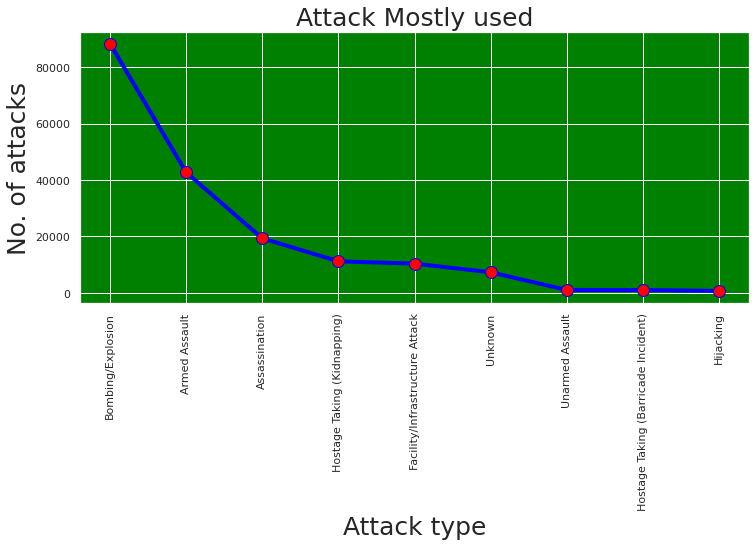

In [ ]:
# Types of Attacks Mostly Used


#plt.style.use('dark_background')
plt.figure(figsize = (12,5))
ax = plt.axes()
ax.set_facecolor("green")
plt.plot(known_attack_type.index, known_attack_type.values, color='blue', marker = 'o', linewidth = 4,  markerfacecolor='red', markersize=12)
plt.title('Attack Mostly used',fontsize=25)
plt.xlabel('Attack type',fontsize=25)
plt.ylabel('No. of attacks',fontsize=25)
plt.xticks(rotation=90)
plt.show()

**conclusion** : Most of the attack (approx 50%) is happenend with the Bombing/Explosion:
 

  




* 10-20% of the Attack happened with Armed Assault .
* hijacking is the less used Attack Type used by terrorists.
* Remaining other are in between 0-6%










## 4. Top 10 most attacked targets.

In [ ]:
##Eliminating unknown Main_Target and printing top 10 Main_Target
known_attacked_target = global_terrorism[global_terrorism['Main_Target'] !='Unknown']
top_attacked_targets = known_attacked_target['Main_Target'].value_counts()[:10]
top_attacked_targets

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Name: Main_Target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



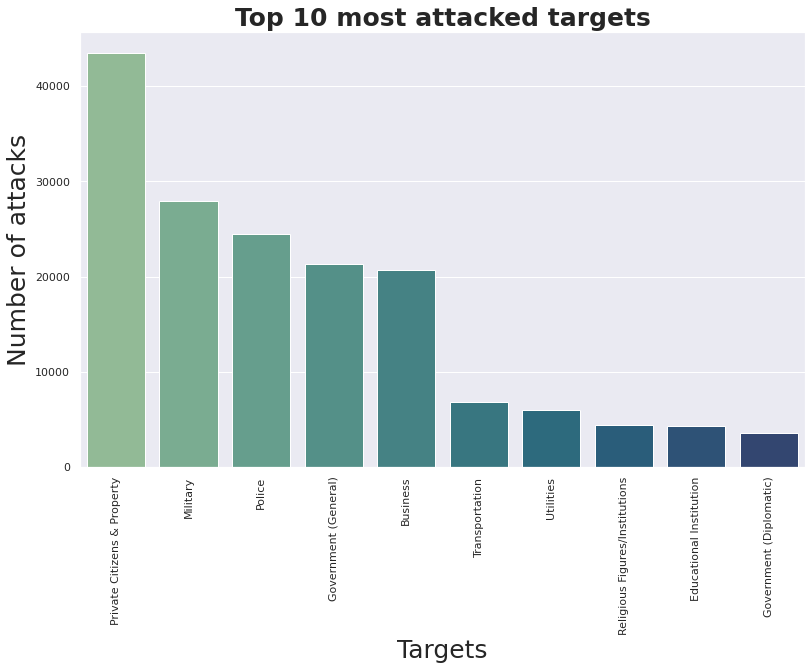

In [ ]:
plt.figure(figsize = (13,8))
sns.barplot(top_attacked_targets.index, top_attacked_targets.values, palette='crest')
plt.title('Top 10 most attacked targets',fontsize=25 , fontweight='bold')
plt.xlabel('Targets',fontsize=25)
plt.ylabel('Number of attacks',fontsize=25)
plt.xticks(rotation=90)
plt.show()

#### **This Graph Shows:**


*   The most Attacked Target is 'Private Citizens & Property' which is approximately 25%
* 10-20% is the Target which is 'Military','Police', 'Government', 'Business'



## **Analysis based on killiings**

1.   Top 10 terrorist organization with highest kills.
2.   Yearly growth of terrorist attacks.
3.   Location in which 50+ people were killed in the year which having the most terrorist attacks.
4.   Death analysis in both Country and Region wise.



## 1. Top 10 terrorist organization with highest kills.

In [ ]:
known_gang_name = global_terrorism[(global_terrorism['Gang_Name'] !='Unknown')]
total_killed_by_a_gang = known_gang_name.groupby('Gang_Name')['Killed'].sum()
total_killed_by_a_gang = total_killed_by_a_gang.sort_values(ascending=False)
top_gang_with_most_killed=total_killed_by_a_gang.head(10)
top_gang_with_most_killed

Gang_Name
Islamic State of Iraq and the Levant (ISIL)         38923
Taliban                                             29410
Boko Haram                                          20328
Shining Path (SL)                                   11601
Liberation Tigers of Tamil Eelam (LTTE)             10989
Al-Shabaab                                           9330
Farabundo Marti National Liberation Front (FMLN)     8065
Nicaraguan Democratic Force (FDN)                    6662
Tehrik-i-Taliban Pakistan (TTP)                      6042
Revolutionary Armed Forces of Colombia (FARC)        5661
Name: Killed, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



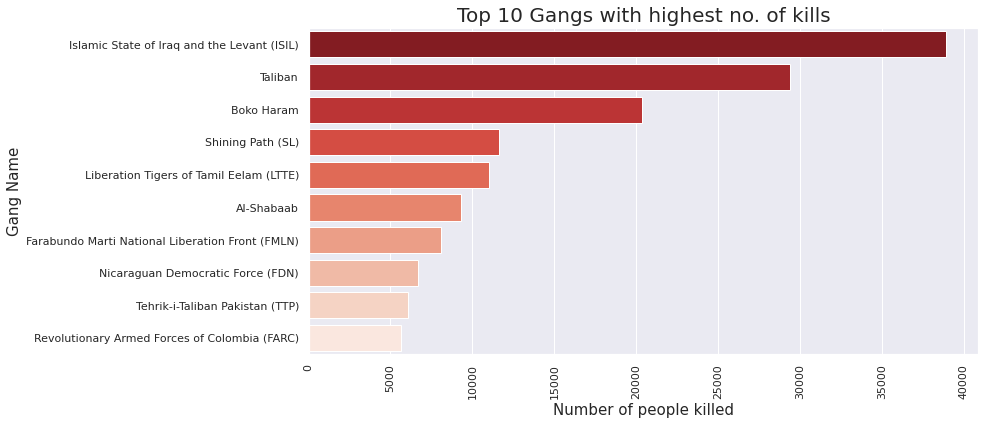

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(top_gang_with_most_killed.values, top_gang_with_most_killed.index,palette='Reds_r')
plt.title('Top 10 Gangs with highest no. of kills',fontsize=20)
plt.xlabel('Number of people killed',fontsize=15)
plt.ylabel('Gang Name',fontsize=15)
plt.xticks(rotation= 90)
plt.show()
plt.savefig('top_gang_with_most_killed.jpg')

**According to analysis:**
* **'Islamic State of Iraq and the Levant (ISIL)'** killed most of number of people which is almost approx **(40k)** followed by **'Taliban'** and **'Bokko Haran'** who has  killed approx **(30k)** & **(20k)** respectively.


## 2. Yearly growth of terrorist attacks.

In [ ]:
# getting unique values of 'Year'
unique_year = global_terrorism['Year'].unique()
unique_year


array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017])

In [ ]:
#sort & count the unique values
sorted_year = global_terrorism['Year'].value_counts(dropna = False).sort_index()
print(sorted_year)

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64


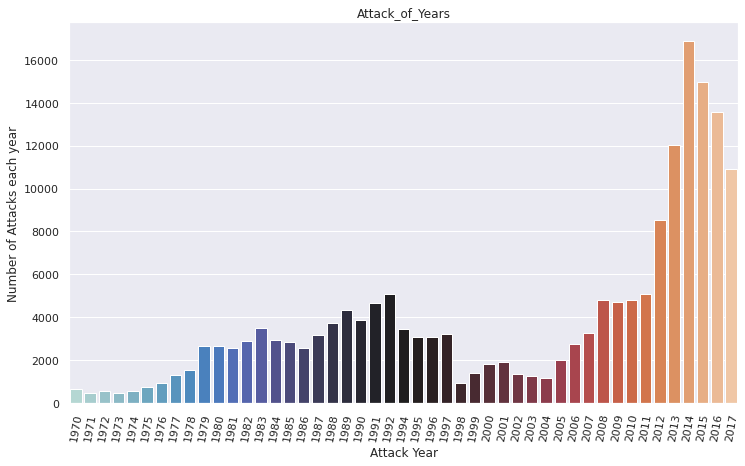

In [ ]:
plt.figure(figsize = (12,7))
sns.barplot(x = unique_year,
           y = sorted_year,
           palette = "icefire")
plt.xticks(rotation = 80)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()


#### **After the analysis we can say that:** 
* 2014 appears to be witness of a huge terrorist attacks.
* After 2011 we can see that there is a large growth recorded in terrorist attack.

##3.  Location in which 50+ people were killed in the year which having the most terrorist attacks.

In [ ]:
# selecting the 'Latittude' and 'Longitude' where 50+ people were killed in 2014
lon=global_terrorism[(global_terrorism['Year']==2014) & (global_terrorism['Killed']>=50)]['Longitude']
lat=global_terrorism[(global_terrorism['Year']==2014) & (global_terrorism['Killed']>=50)]['Latitude']


In [ ]:
fig =px.density_mapbox(global_terrorism,lat =lat,lon = lon,radius = 10,center = dict(lat=9,lon=9),zoom = 1,
                       hover_name = global_terrorism[(global_terrorism['Year']==2014) & (global_terrorism['Killed']>=50)]['Country'],
                     mapbox_style = 'open-street-map',title = 'Location where 50+ people were killed in 2014')
fig.show()

* The above geo map gives us the visualization of locations where more than 50 people were killed in 2014

## 4. Death analysis in both Country and Region wise.

In [ ]:
# group by the columns ('country' & 'killed') and then sort it.
kill_country=global_terrorism.groupby(['Country'])['Killed'].sum().sort_values(ascending = False).head(10)
kill_country

Country
Iraq           78589
Afghanistan    39384
Pakistan       23822
Nigeria        22682
India          19341
Sri Lanka      15530
Syria          15229
Colombia       14698
Peru           12771
El Salvador    12053
Name: Killed, dtype: int64

In [ ]:
# group by the columns ('region' & 'killed') and then sort it.
kill_region = global_terrorism.groupby(['Region'])['Killed'].sum().sort_values(ascending = False)
kill_region

Region
Middle East & North Africa     137642
South Asia                     101319
Sub-Saharan Africa              78386
South America                   28849
Central America & Caribbean     28708
Southeast Asia                  15637
Eastern Europe                   7415
Western Europe                   6694
North America                    4916
East Asia                        1152
Central Asia                     1000
Australasia & Oceania             150
Name: Killed, dtype: int64

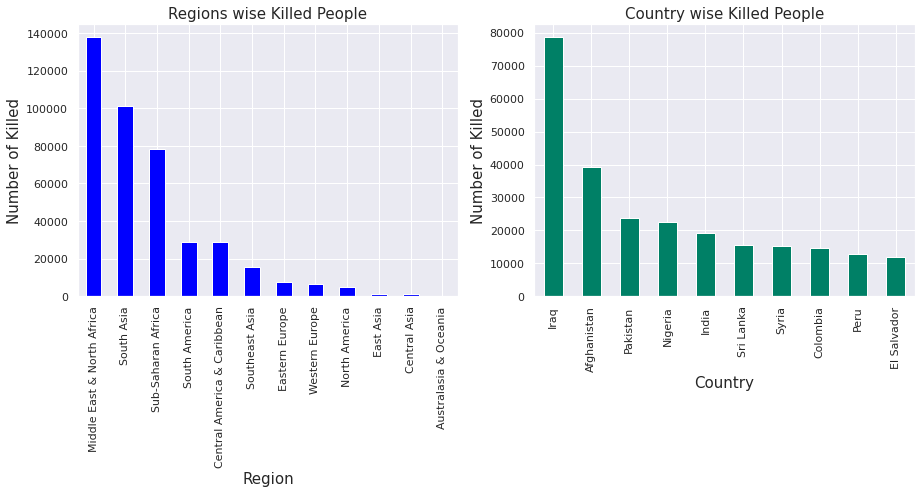

In [ ]:
plt.subplot(1,2,2)
kill_country.plot(kind='bar',colormap='summer')
plt.title('Country wise Killed People',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of Killed',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)



plt.subplot(1,2,1)
kill_region.plot(kind='bar',colormap='winter')

plt.title('Regions wise Killed People',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Number of Killed',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

#### With these Graphs, we can conclude that :
*  In countries 'Iraq' has the most killed people approx(80k) followed by 'Afghanistan' & 'Pakistan'.
* 'Middle East & North Africa' Region has the most Killed people approx(1.4 Lacs) followed by 'South-Asia' & 'Sub-saharan Africa'.


# **Analysis based on Country,Region and State**

1.   Top 10 most attacked country
2.   Most attacked region and state


## 1. Top 10 most attacked country

In [ ]:
most_attacked_country = global_terrorism.Country.value_counts()[:10]
most_attacked_country

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



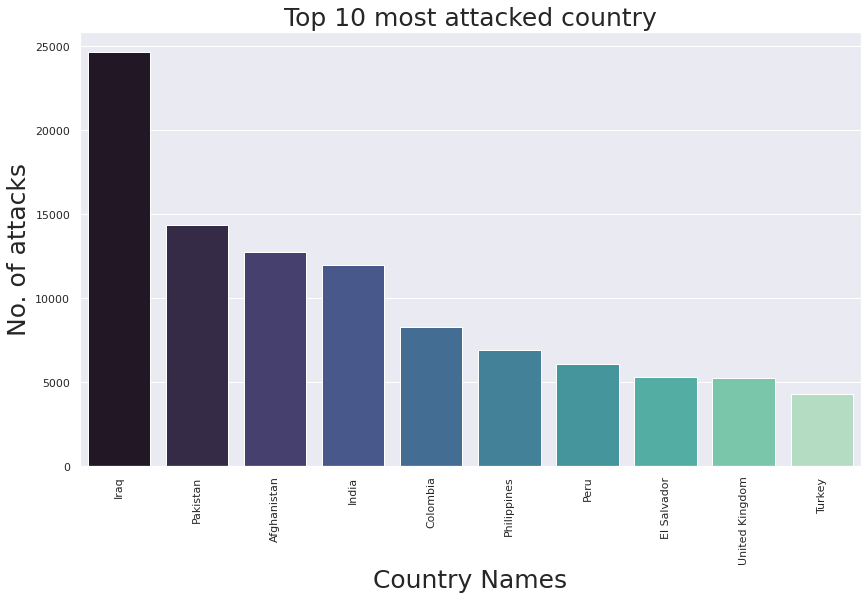

In [ ]:
plt.figure(figsize = (14,8))
sns.barplot(most_attacked_country.index, most_attacked_country.values, 
            palette='mako')
plt.title('Top 10 most attacked country',fontsize=25)
plt.xlabel('Country Names',fontsize=25)
plt.ylabel('No. of attacks',fontsize=25)
plt.xticks(rotation=90)
plt.show()


* According to research, Iraq is the most affected country by terrorist, then followed by Pakistan and Afganistan.










## 2. Most attacked region and state

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



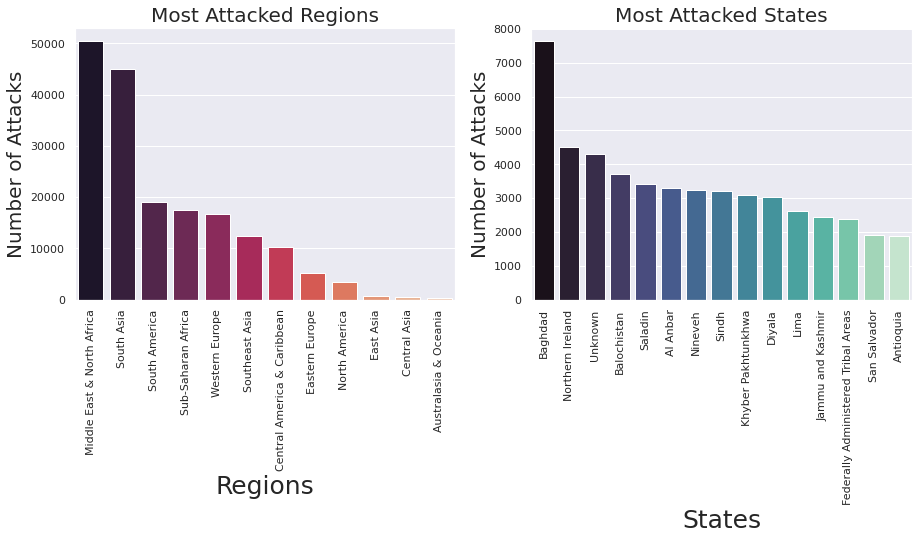

In [ ]:
plt.subplot(1,2,1)
# regions with most attacks 
sns.barplot(global_terrorism['Region'].value_counts().index, global_terrorism['Region'].value_counts().values,palette='rocket')
plt.title('Most Attacked Regions',fontsize=20)
plt.xlabel('Regions',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xticks(rotation=90)

# states with most attack
plt.subplot(1,2,2)
sns.barplot(global_terrorism['State'].value_counts().head(15).index, global_terrorism['State'].value_counts().head(15).values,palette='mako')
plt.title('Most Attacked States',fontsize=20)
plt.xlabel('States',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

* Most Attacked Region is 'Middle East and North Africa' then comes South Asia
* Most Attacked States is 'Baghdad' then comes 'Northem irland'



#**Following is the overall analysis:**

1. **"Taliban"** is the most powerful, dangerous  and the  most active gang among all of the gangs, followed by **"islamic state of iraq and the levant(isil)"** and **"shining path(SL)"**.

2. 50% of the attacks have occurred because of **Bombing/Explosion** and  10-20% occurred because of **Armed Assault** & Remaining other are in between 0-6%.

3. The most targetted attacks are on **"Private Citizens & Property"** which is approximately **25%** and **10-20%** is the target on **"Military"**,   **"Police"**,     **"Government"**,    **"Business"**.

4.  **"Islamic State of Iraq and the Levant (ISIL)"** killed the most number of people which is approximately **40k** followed by **"Taliban"** and **"Boko Haram"** with an approximation of **30k** & **20k** respectively.

5. After **2011** we can observe that there is a large growth recorded in terrorist attacks followed by **2014** which appears to witness a sudden growth in the terrorist attacks.

6. * **"Iraq"** is the country that has the highest number of people killed due to terrorist attacks, approximately 80k followed by **"Afghanistan"** & **"Pakistan"**
   * Among all the regions **"Middle East & North Africa"** has the most number of killed people approx 1.4 Lakhs followed by **"South-Asia"** & **"Sub-saharan Africa"**.
7. According to the research, **"Iraq"** is the most affected country by the terrorists, followed by **"Pakistan"** and **"Afghanistan"**.
8. * Most number of attacks have happened in the **"Middle East and North Africa's"** region followed by **"south asia"** and other regions
    * Most number of attacks have happened in the **"Baghdad"** followed by **"Northem irland"**and other many other states.